## Synthetic data

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score

from synthesize_data import synthesize_data
import expectation_reflection as ER
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(1)

In [3]:
def inference(X_train,y_train,X_test,y_test,method='expectation_reflection'):
    if method == 'expectation_reflection':
        h0,w = ER.fit(X_train,y_train,niter_max=100,regu=0.)
        y_pred = ER.predict(X_test,h0,w)
        y_pred_train = ER.predict(X_train,h0,w)

    else:
        if method == 'logistic_regression':
            model = LogisticRegression(solver='liblinear')

        if method == 'naive_bayes': 
            model = GaussianNB()

        if method == 'random_forest':
            model = RandomForestClassifier(criterion = "gini", random_state = 1,
                           max_depth=3, min_samples_leaf=5,n_estimators=100)   
            
        if method == 'decision_tree':
            model = DecisionTreeClassifier()  

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_train = model.predict(X_train)
        
    accuracy = accuracy_score(y_test,y_pred)                
                  
    return accuracy

In [4]:
list_methods=['logistic_regression','naive_bayes','random_forest','decision_tree','expectation_reflection']
def compare_inference(X,y,train_size):
    npred = 100
    accuracy = np.zeros((len(list_methods),npred))
    precision = np.zeros((len(list_methods),npred))
    recall = np.zeros((len(list_methods),npred))
    accuracy_train = np.zeros((len(list_methods),npred))
    for ipred in range(npred):
        X, y = shuffle(X, y)
        X_train0,X_test,y_train0,y_test = train_test_split(X,y,test_size=0.2,random_state = ipred)

        #idx_train = np.random.choice(len(y_train0),size=int(train_size*len(y_train0)),replace=False)
        idx_train = np.random.choice(len(y_train0),size=int(train_size*len(y)),replace=False)
        X_train,y_train = X_train0[idx_train],y_train0[idx_train]

        for i,method in enumerate(list_methods):
            accuracy[i,ipred] = inference(X_train,y_train,X_test,y_test,method)
            
    return accuracy.mean(axis=1)

In [5]:
def plot_accuracy():
    plt.figure(figsize=(4,3))    
    plt.plot(list_train_size,acc[:,0],'k--',marker='o',mfc='none',label='Logistic Regression')
    plt.plot(list_train_size,acc[:,1],'b--',marker='s',mfc='none',label='Naive Bayes')
    plt.plot(list_train_size,acc[:,2],'r--',marker='^',mfc='none',label='Random Forest')
    #plt.plot(list_train_size,acc[:,3],'b--',label='Decision Tree')
    plt.plot(list_train_size,acc[:,4],'k-',marker='o',label='Expectation Reflection')
    plt.xlabel('train size')
    plt.ylabel('accuracy')
    plt.legend()

### Binary variables

In [22]:
l = 10000 ; n = 40 ; g = 4.

In [23]:
X,y = synthesize_data(l,n,g,data_type='binary')

In [24]:
list_train_size = [0.8,0.6,0.4,0.2,0.1]
acc = np.zeros((len(list_train_size),len(list_methods)))
for i,train_size in enumerate(list_train_size):
    acc[i,:] = compare_inference(X,y,train_size)
    print(train_size,acc[i,:])

0.8 [0.983185 0.96638  0.842995 0.77725  0.98656 ]
0.6 [0.981765 0.96371  0.84246  0.76859  0.98643 ]
0.4 [0.97776  0.957135 0.84342  0.76522  0.9844  ]
0.2 [0.967735 0.942865 0.842575 0.745865 0.979915]
0.1 [0.954145 0.92221  0.840175 0.72522  0.97274 ]


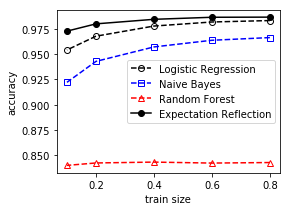

In [25]:
plot_accuracy()

### Continuous variables

In [18]:
l = 10000 ; n = 40 ; g = 4.

In [19]:
X,y = synthesize_data(l,n,g,data_type='continuous')

In [20]:
for i,train_size in enumerate(list_train_size):
    acc[i,:] = compare_inference(X,y,train_size)
    print(train_size,acc[i,:])

0.8 [0.971305 0.95722  0.793645 0.688575 0.976495]
0.6 [0.969965 0.9554   0.797985 0.68131  0.97634 ]
0.4 [0.9658   0.94816  0.79635  0.673375 0.97547 ]
0.2 [0.955055 0.93276  0.79878  0.660265 0.97121 ]
0.1 [0.9401   0.911165 0.79374  0.64784  0.965245]


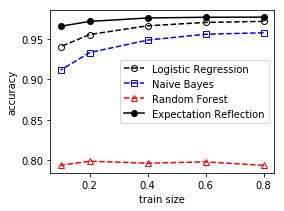

In [21]:
plot_accuracy()

### Categorical variables

In [39]:
l = 10000 ; n = 40 ; g = 4.

In [40]:
X,y = synthesize_data(l,n,g,data_type='categorical')

In [41]:
for i,train_size in enumerate(list_train_size):
    acc[i,:] = compare_inference(X,y,train_size)
    print(train_size,acc[i,:])

0.8 [0.979035 0.940335 0.628765 0.635425 0.978365]
0.6 [0.975905 0.9336   0.62882  0.632125 0.97561 ]
0.4 [0.96986  0.920315 0.62656  0.624715 0.970335]
0.2 [0.95439  0.891715 0.62653  0.61425  0.956785]
0.1 [0.9238   0.85459  0.62733  0.604685 0.927085]


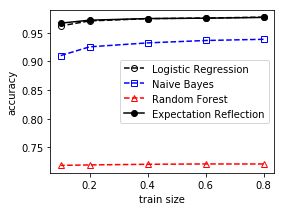

In [38]:
plot_accuracy()